# CA11: Advanced Model-Based RL and World Models

## Deep Reinforcement Learning - Session 11

**Advanced Model-Based Reinforcement Learning: World Models, Planning in Latent Space, and Modern Approaches**

This notebook explores cutting-edge model-based reinforcement learning techniques, focusing on world models, latent space planning, uncertainty quantification, and state-of-the-art methods like Dreamer, PlaNet, and Model-Based Policy Optimization (MBPO).

### Learning Objectives:
1. Understand world models and latent state representations
2. Implement variational autoencoders for state modeling
3. Master planning in latent space with learned dynamics
4. Explore uncertainty quantification in model-based RL
5. Implement Dreamer-style world model learning
6. Understand Model-Based Policy Optimization (MBPO)
7. Apply ensemble methods for robust model learning
8. Analyze sample efficiency and computational trade-offs

### Notebook Structure:
1. **World Models and Latent Representations** - VAE-based state modeling
2. **Recurrent State Space Models** - Temporal dynamics in latent space
3. **Planning in Latent Space** - Actor-Critic learning within world models
4. **Uncertainty Quantification** - Ensemble models and Bayesian approaches
5. **Model-Based Policy Optimization** - MBPO algorithm implementation
6. **Dreamer Algorithm** - Complete world model implementation
7. **Advanced Techniques** - Meta-learning and hierarchical models
8. **Comprehensive Evaluation** - Sample efficiency and performance analysis

---

In [2]:
# Essential Imports and Advanced Setup
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal, MultivariateNormal, kl_divergence
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict, deque
import random
import pickle
from typing import Tuple, List, Dict, Optional, Union, NamedTuple
import warnings
from dataclasses import dataclass
import math
from tqdm import tqdm
warnings.filterwarnings('ignore')

# Advanced imports for world models
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.distributions.utils import _standard_normal
import torchvision.transforms as transforms
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
random.seed(SEED)

# Device configuration with optimizations
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

print(f"🚀 Advanced Model-Based RL Environment Setup")
print(f"Device: {device}")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")

# Plotting configuration for professional visualizations
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Color palette for consistent visualizations
colors = sns.color_palette("husl", 8)
sns.set_palette(colors)

print("✅ Environment setup complete!")
print("🌟 Ready for advanced model-based reinforcement learning!")

🚀 Advanced Model-Based RL Environment Setup
Device: cpu
PyTorch version: 2.8.0
CUDA available: False
✅ Environment setup complete!
🌟 Ready for advanced model-based reinforcement learning!


# Section 1: World Models and Latent Representations

## 1.1 Theoretical Foundation

**World Models** represent a paradigm shift in model-based reinforcement learning, where instead of learning models in the raw observation space, we learn compressed representations of the environment in a latent space.

### Key Concepts:

1. **Latent State Representation**: $z_t = \text{Encode}(o_t)$
2. **Dynamics in Latent Space**: $z_{t+1} = f(z_t, a_t) + \epsilon$
3. **Reconstruction**: $\hat{o}_t = \text{Decode}(z_t)$

### Advantages of World Models:

- **Dimensionality Reduction**: High-dimensional observations → compact latent states
- **Semantic Compression**: Focus on task-relevant features
- **Efficient Planning**: Plan in low-dimensional latent space
- **Generalization**: Transfer learned representations across tasks

## 1.2 Mathematical Framework

### Variational Autoencoder (VAE) Foundation

The world model uses a VAE to learn latent representations:

**Encoder (Recognition Model)**:
$$q_\phi(z_t|o_t) = \mathcal{N}(z_t; \mu_\phi(o_t), \sigma_\phi^2(o_t))$$

**Decoder (Generative Model)**:
$$p_\theta(o_t|z_t) = \mathcal{N}(o_t; \mu_\theta(z_t), \sigma_\theta^2(z_t))$$

**VAE Loss Function**:
$$\mathcal{L}_{VAE} = \mathcal{L}_{recon} + \beta \mathcal{L}_{KL}$$

Where:
- $\mathcal{L}_{recon} = ||o_t - \hat{o}_t||^2$ (Reconstruction loss)
- $\mathcal{L}_{KL} = D_{KL}(q_\phi(z_t|o_t) || p(z_t))$ (KL regularization)

### Dynamics Model in Latent Space

**Deterministic Dynamics**:
$$z_{t+1} = f_\psi(z_t, a_t)$$

**Stochastic Dynamics**:
$$p(z_{t+1}|z_t, a_t) = \mathcal{N}(z_{t+1}; \mu_\psi(z_t, a_t), \sigma_\psi^2(z_t, a_t))$$

### Reward Model

**Reward Prediction**:
$$\hat{r}_t = r_\xi(z_t, a_t)$$

This enables complete planning in the latent space without accessing the environment.

🌍 World Models and Latent Representations Demonstration
\n1. Setting up environment and collecting data...
Collected 1777 transitions
\n2. Creating and training world model...
Training for 100 epochs with batch size 64
Epoch 20: VAE Loss = 48.2213, Dynamics Loss = 1.4327, Reward Loss = 0.0294
Epoch 40: VAE Loss = 47.6953, Dynamics Loss = 1.4139, Reward Loss = 0.0294
Epoch 60: VAE Loss = 47.5789, Dynamics Loss = 1.4380, Reward Loss = 0.0285
Epoch 80: VAE Loss = 47.5101, Dynamics Loss = 1.4003, Reward Loss = 0.0284
Epoch 100: VAE Loss = 47.6015, Dynamics Loss = 1.3901, Reward Loss = 0.0280
\n3. Evaluating world model performance...
\n📊 World Model Evaluation:
  Reconstruction Error (MSE): 0.096436
  Dynamics Prediction Error (MSE): 0.000261
  Reward Prediction Error (MSE): 0.057167


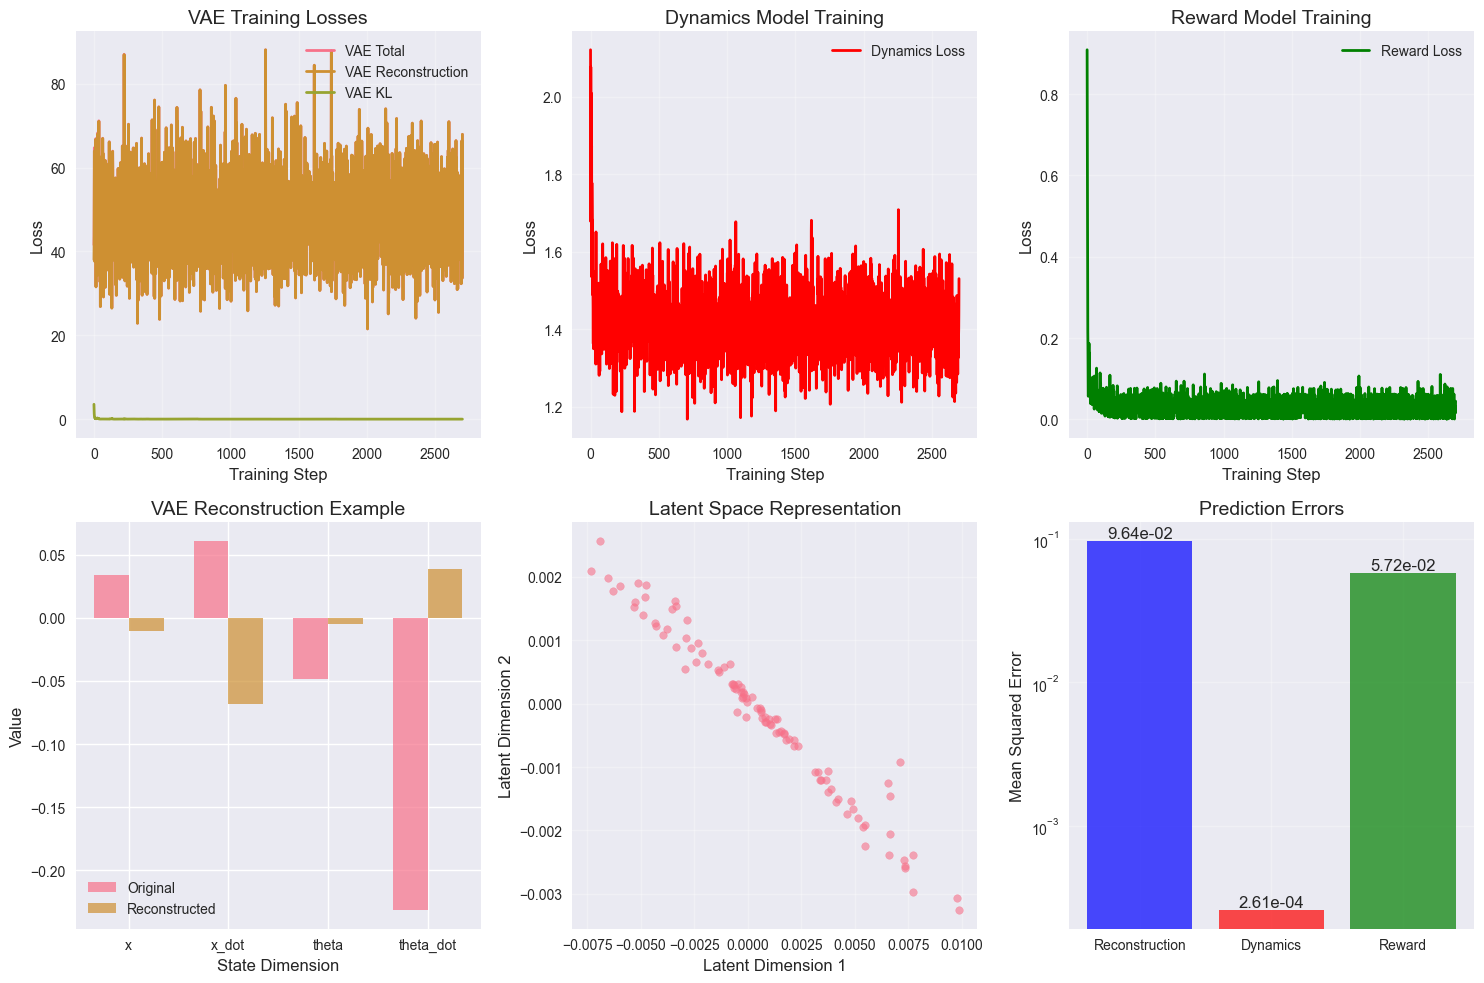

In [10]:
# World Models Implementation

class VariationalAutoencoder(nn.Module):
    """Variational Autoencoder for learning latent representations"""
    
    def __init__(self, obs_dim, latent_dim, hidden_dim=256, beta=1.0):
        super().__init__()
        self.obs_dim = obs_dim
        self.latent_dim = latent_dim
        self.beta = beta
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(obs_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        
        # Latent space parameters
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, obs_dim)
        )
        
    def encode(self, x):
        """Encode observation to latent distribution parameters"""
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        """Reparameterization trick for sampling"""
        if self.training:
            std = torch.exp(0.5 * logvar)
            eps = torch.randn_like(std)
            return mu + eps * std
        else:
            return mu
    
    def decode(self, z):
        """Decode latent state to observation"""
        return self.decoder(z)
    
    def forward(self, x):
        """Forward pass through VAE"""
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar, z
    
    def loss_function(self, x, recon_x, mu, logvar):
        """VAE loss computation"""
        # Reconstruction loss (MSE)
        recon_loss = F.mse_loss(recon_x, x, reduction='sum')
        
        # KL divergence loss
        kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        
        # Total VAE loss
        total_loss = recon_loss + self.beta * kl_loss
        
        return total_loss, recon_loss, kl_loss

class LatentDynamicsModel(nn.Module):
    """Dynamics model in latent space"""
    
    def __init__(self, latent_dim, action_dim, hidden_dim=256, stochastic=True):
        super().__init__()
        self.latent_dim = latent_dim
        self.action_dim = action_dim
        self.stochastic = stochastic
        
        # Dynamics network
        self.dynamics = nn.Sequential(
            nn.Linear(latent_dim + action_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        
        if stochastic:
            # Stochastic dynamics: predict mean and log variance
            self.fc_mu = nn.Linear(hidden_dim, latent_dim)
            self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        else:
            # Deterministic dynamics
            self.fc_next_state = nn.Linear(hidden_dim, latent_dim)
    
    def forward(self, z, a):
        """Predict next latent state given current state and action"""
        # Concatenate state and action
        za = torch.cat([z, a], dim=-1)
        h = self.dynamics(za)
        
        if self.stochastic:
            mu = self.fc_mu(h)
            logvar = self.fc_logvar(h)
            
            if self.training:
                # Sample during training
                std = torch.exp(0.5 * logvar)
                eps = torch.randn_like(std)
                z_next = mu + eps * std
            else:
                # Use mean during evaluation
                z_next = mu
                
            return z_next, mu, logvar
        else:
            z_next = self.fc_next_state(h)
            return z_next
    
    def loss_function(self, z_pred, z_target, mu=None, logvar=None):
        """Dynamics model loss"""
        if self.stochastic and mu is not None and logvar is not None:
            # Stochastic dynamics loss with KL regularization
            pred_loss = F.mse_loss(z_pred, z_target)
            kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
            return pred_loss + 0.001 * kl_loss  # Small KL weight
        else:
            # Deterministic dynamics loss
            return F.mse_loss(z_pred, z_target)

class RewardModel(nn.Module):
    """Reward prediction model in latent space"""
    
    def __init__(self, latent_dim, action_dim, hidden_dim=256):
        super().__init__()
        
        self.reward_net = nn.Sequential(
            nn.Linear(latent_dim + action_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
    
    def forward(self, z, a):
        """Predict reward given latent state and action"""
        za = torch.cat([z, a], dim=-1)
        return self.reward_net(za).squeeze(-1)
    
    def loss_function(self, pred_reward, target_reward):
        """Reward prediction loss"""
        return F.mse_loss(pred_reward, target_reward)

class WorldModel(nn.Module):
    """Complete World Model combining VAE, dynamics, and reward models"""
    
    def __init__(self, obs_dim, action_dim, latent_dim=64, hidden_dim=256, 
                 stochastic_dynamics=True, beta=1.0):
        super().__init__()
        
        self.obs_dim = obs_dim
        self.action_dim = action_dim
        self.latent_dim = latent_dim
        
        # Component models
        self.vae = VariationalAutoencoder(obs_dim, latent_dim, hidden_dim, beta)
        self.dynamics = LatentDynamicsModel(latent_dim, action_dim, hidden_dim, stochastic_dynamics)
        self.reward_model = RewardModel(latent_dim, action_dim, hidden_dim)
        
        # Training statistics
        self.training_stats = {
            'vae_loss': [],
            'dynamics_loss': [],
            'reward_loss': [],
            'total_loss': []
        }
    
    def encode_observations(self, obs):
        """Encode observations to latent states"""
        with torch.no_grad():
            mu, logvar = self.vae.encode(obs)
            z = self.vae.reparameterize(mu, logvar)
            return z
    
    def decode_latent_states(self, z):
        """Decode latent states to observations"""
        with torch.no_grad():
            return self.vae.decode(z)
    
    def predict_next_state(self, z, a):
        """Predict next latent state"""
        return self.dynamics(z, a)
    
    def predict_reward(self, z, a):
        """Predict reward"""
        return self.reward_model(z, a)
    
    def rollout(self, initial_obs, actions, return_observations=False):
        """Perform rollout in world model"""
        batch_size = initial_obs.shape[0]
        horizon = actions.shape[1]
        
        # Encode initial observation
        z = self.encode_observations(initial_obs)
        
        states = [z]
        rewards = []
        observations = []
        
        for t in range(horizon):
            # Predict reward
            r = self.predict_reward(z, actions[:, t])
            rewards.append(r)
            
            # Predict next state
            if self.dynamics.stochastic:
                z, _, _ = self.predict_next_state(z, actions[:, t])
            else:
                z = self.predict_next_state(z, actions[:, t])
            
            states.append(z)
            
            if return_observations:
                obs = self.decode_latent_states(z)
                observations.append(obs)
        
        results = {
            'states': torch.stack(states, dim=1),
            'rewards': torch.stack(rewards, dim=1)
        }
        
        if return_observations:
            results['observations'] = torch.stack(observations, dim=1)
        
        return results

class WorldModelTrainer:
    """Trainer for world model components"""
    
    def __init__(self, world_model, device, lr=1e-3):
        self.world_model = world_model.to(device)
        self.device = device
        
        # Optimizers for different components
        self.vae_optimizer = optim.Adam(world_model.vae.parameters(), lr=lr)
        self.dynamics_optimizer = optim.Adam(world_model.dynamics.parameters(), lr=lr)
        self.reward_optimizer = optim.Adam(world_model.reward_model.parameters(), lr=lr)
        
        # Training statistics
        self.losses = {
            'vae_total': [],
            'vae_recon': [],
            'vae_kl': [],
            'dynamics': [],
            'reward': []
        }
    
    def train_step(self, batch):
        """Single training step on a batch of data"""
        obs, actions, rewards, next_obs = batch
        
        obs = obs.to(self.device)
        actions = actions.to(self.device)
        rewards = rewards.to(self.device)
        next_obs = next_obs.to(self.device)
        
        # Train VAE on observations
        self.vae_optimizer.zero_grad()
        recon_obs, mu_obs, logvar_obs, z_obs = self.world_model.vae(obs)
        recon_next_obs, mu_next_obs, logvar_next_obs, z_next_obs = self.world_model.vae(next_obs)
        
        vae_loss_obs, recon_loss_obs, kl_loss_obs = self.world_model.vae.loss_function(
            obs, recon_obs, mu_obs, logvar_obs)
        vae_loss_next_obs, recon_loss_next_obs, kl_loss_next_obs = self.world_model.vae.loss_function(
            next_obs, recon_next_obs, mu_next_obs, logvar_next_obs)
        
        vae_total_loss = vae_loss_obs + vae_loss_next_obs
        vae_total_loss.backward()
        self.vae_optimizer.step()
        
        # Train dynamics model
        self.dynamics_optimizer.zero_grad()
        z_obs_detached = z_obs.detach()
        z_next_obs_detached = z_next_obs.detach()
        
        if self.world_model.dynamics.stochastic:
            z_pred, mu_pred, logvar_pred = self.world_model.dynamics(z_obs_detached, actions)
            dynamics_loss = self.world_model.dynamics.loss_function(
                z_pred, z_next_obs_detached, mu_pred, logvar_pred)
        else:
            z_pred = self.world_model.dynamics(z_obs_detached, actions)
            dynamics_loss = self.world_model.dynamics.loss_function(z_pred, z_next_obs_detached)
        
        dynamics_loss.backward()
        self.dynamics_optimizer.step()
        
        # Train reward model
        self.reward_optimizer.zero_grad()
        pred_rewards = self.world_model.reward_model(z_obs_detached, actions)
        reward_loss = self.world_model.reward_model.loss_function(pred_rewards, rewards)
        reward_loss.backward()
        self.reward_optimizer.step()
        
        # Record losses
        self.losses['vae_total'].append(vae_total_loss.item())
        self.losses['vae_recon'].append((recon_loss_obs + recon_loss_next_obs).item())
        self.losses['vae_kl'].append((kl_loss_obs + kl_loss_next_obs).item())
        self.losses['dynamics'].append(dynamics_loss.item())
        self.losses['reward'].append(reward_loss.item())
        
        return {
            'vae_loss': vae_total_loss.item(),
            'dynamics_loss': dynamics_loss.item(),
            'reward_loss': reward_loss.item()
        }

# Simple Environment for World Model Testing
class ContinuousCartPole:
    """Continuous version of CartPole for world model testing"""
    
    def __init__(self):
        self.state_dim = 4
        self.action_dim = 1
        self.max_steps = 200
        self.current_step = 0
        
        # Physics parameters
        self.gravity = 9.8
        self.masscart = 1.0
        self.masspole = 0.1
        self.total_mass = self.masspole + self.masscart
        self.length = 0.5
        self.polemass_length = self.masspole * self.length
        self.force_mag = 10.0
        self.tau = 0.02  # seconds between state updates
        
        # State bounds
        self.x_threshold = 2.4
        self.theta_threshold_radians = 12 * 2 * math.pi / 360
        
        self.state = None
        self.reset()
    
    def reset(self):
        """Reset environment to initial state"""
        self.state = np.random.uniform(-0.05, 0.05, size=(4,))
        self.current_step = 0
        return self.state.copy()
    
    def step(self, action):
        """Take environment step"""
        if isinstance(action, torch.Tensor):
            action = action.cpu().numpy()
        if isinstance(action, np.ndarray):
            action = action.item()
        
        # Clip action to valid range
        action = np.clip(action, -1.0, 1.0)
        force = action * self.force_mag
        
        x, x_dot, theta, theta_dot = self.state
        
        costheta = math.cos(theta)
        sintheta = math.sin(theta)
        
        # Physics calculations
        temp = (force + self.polemass_length * theta_dot ** 2 * sintheta) / self.total_mass
        thetaacc = (self.gravity * sintheta - costheta * temp) / (
            self.length * (4.0 / 3.0 - self.masspole * costheta ** 2 / self.total_mass)
        )
        xacc = temp - self.polemass_length * thetaacc * costheta / self.total_mass
        
        # Update state
        x = x + self.tau * x_dot
        x_dot = x_dot + self.tau * xacc
        theta = theta + self.tau * theta_dot
        theta_dot = theta_dot + self.tau * thetaacc
        
        self.state = np.array([x, x_dot, theta, theta_dot])
        self.current_step += 1
        
        # Calculate reward and done
        done = (
            x < -self.x_threshold or x > self.x_threshold or
            theta < -self.theta_threshold_radians or theta > self.theta_threshold_radians or
            self.current_step >= self.max_steps
        )
        
        reward = 1.0 if not done else 0.0
        
        return self.state.copy(), reward, done
    
    def sample_action(self):
        """Sample random action"""
        return np.random.uniform(-1.0, 1.0)

# Demonstration: World Model Learning
print("🌍 World Models and Latent Representations Demonstration")
print("=" * 60)

# Create environment and collect data
print("\\n1. Setting up environment and collecting data...")
env = ContinuousCartPole()

# Data collection
def collect_random_data(env, n_episodes=100):
    data = {
        'observations': [],
        'actions': [],
        'rewards': [],
        'next_observations': []
    }
    
    for episode in range(n_episodes):
        obs = env.reset()
        
        for step in range(200):  # Max episode length
            action = env.sample_action()
            next_obs, reward, done = env.step(action)
            
            data['observations'].append(obs)
            data['actions'].append([action])
            data['rewards'].append(reward)
            data['next_observations'].append(next_obs)
            
            obs = next_obs
            if done:
                break
    
    # Convert to tensors
    for key in data:
        data[key] = torch.FloatTensor(data[key])
    
    return data

# Collect training data
training_data = collect_random_data(env, n_episodes=50)
print(f"Collected {len(training_data['observations'])} transitions")

# Create world model
print("\\n2. Creating and training world model...")
world_model = WorldModel(
    obs_dim=env.state_dim,
    action_dim=env.action_dim,
    latent_dim=8,  # Compact latent representation
    hidden_dim=128,
    stochastic_dynamics=True,
    beta=1.0
)

trainer = WorldModelTrainer(world_model, device, lr=1e-3)

# Training loop
n_epochs = 100
batch_size = 64
n_batches = len(training_data['observations']) // batch_size

print(f"Training for {n_epochs} epochs with batch size {batch_size}")

for epoch in range(n_epochs):
    epoch_losses = []
    
    # Shuffle data
    indices = torch.randperm(len(training_data['observations']))
    
    for batch_idx in range(n_batches):
        # Create batch
        start_idx = batch_idx * batch_size
        end_idx = start_idx + batch_size
        batch_indices = indices[start_idx:end_idx]
        
        batch = (
            training_data['observations'][batch_indices],
            training_data['actions'][batch_indices],
            training_data['rewards'][batch_indices],
            training_data['next_observations'][batch_indices]
        )
        
        # Training step
        losses = trainer.train_step(batch)
        epoch_losses.append(losses)
    
    # Print progress
    if (epoch + 1) % 20 == 0:
        avg_losses = {k: np.mean([l[k] for l in epoch_losses]) for k in epoch_losses[0].keys()}
        print(f"Epoch {epoch+1}: VAE Loss = {avg_losses['vae_loss']:.4f}, "
              f"Dynamics Loss = {avg_losses['dynamics_loss']:.4f}, "
              f"Reward Loss = {avg_losses['reward_loss']:.4f}")

print("\\n3. Evaluating world model performance...")

# Test world model predictions
world_model.eval()
test_data = collect_random_data(env, n_episodes=10)
test_batch_size = min(100, len(test_data['observations']))

# Sample test batch
test_indices = torch.randperm(len(test_data['observations']))[:test_batch_size]
test_obs = test_data['observations'][test_indices].to(device)
test_actions = test_data['actions'][test_indices].to(device)
test_rewards = test_data['rewards'][test_indices].to(device)
test_next_obs = test_data['next_observations'][test_indices].to(device)

with torch.no_grad():
    # Test VAE reconstruction
    recon_obs, _, _, z_obs = world_model.vae(test_obs)
    recon_error = F.mse_loss(recon_obs, test_obs).item()
    
    # Test dynamics prediction
    if world_model.dynamics.stochastic:
        z_pred, _, _ = world_model.dynamics(z_obs, test_actions)
    else:
        z_pred = world_model.dynamics(z_obs, test_actions)
    
    # Compare predicted latent states with actual
    recon_obs, _,_, z_next_actual = world_model.vae(test_next_obs)
    dynamics_error = F.mse_loss(z_pred, z_next_actual).item()
    
    # Test reward prediction
    pred_rewards = world_model.reward_model(z_obs, test_actions)
    reward_error = F.mse_loss(pred_rewards, test_rewards).item()

print(f"\\n📊 World Model Evaluation:")
print(f"  Reconstruction Error (MSE): {recon_error:.6f}")
print(f"  Dynamics Prediction Error (MSE): {dynamics_error:.6f}")
print(f"  Reward Prediction Error (MSE): {reward_error:.6f}")

# Visualize results
plt.figure(figsize=(15, 10))

# Training losses
plt.subplot(2, 3, 1)
plt.plot(trainer.losses['vae_total'], label='VAE Total', linewidth=2)
plt.plot(trainer.losses['vae_recon'], label='VAE Reconstruction', linewidth=2)
plt.plot(trainer.losses['vae_kl'], label='VAE KL', linewidth=2)
plt.title('VAE Training Losses')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.plot(trainer.losses['dynamics'], label='Dynamics Loss', color='red', linewidth=2)
plt.title('Dynamics Model Training')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
plt.plot(trainer.losses['reward'], label='Reward Loss', color='green', linewidth=2)
plt.title('Reward Model Training')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Reconstruction visualization
plt.subplot(2, 3, 4)
sample_idx = 0
original_obs = test_obs[sample_idx].cpu().numpy()
reconstructed_obs = recon_obs[sample_idx].cpu().numpy()

x_pos = np.arange(len(original_obs))
width = 0.35

plt.bar(x_pos - width/2, original_obs, width, label='Original', alpha=0.7)
plt.bar(x_pos + width/2, reconstructed_obs, width, label='Reconstructed', alpha=0.7)
plt.title('VAE Reconstruction Example')
plt.xlabel('State Dimension')
plt.ylabel('Value')
plt.legend()
plt.xticks(x_pos, ['x', 'x_dot', 'theta', 'theta_dot'])

# Latent space visualization
plt.subplot(2, 3, 5)
latent_states = z_obs.cpu().numpy()
plt.scatter(latent_states[:, 0], latent_states[:, 1], alpha=0.6, s=30)
plt.title('Latent Space Representation')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.grid(True, alpha=0.3)

# Prediction accuracy
plt.subplot(2, 3, 6)
errors = [recon_error, dynamics_error, reward_error]
labels = ['Reconstruction', 'Dynamics', 'Reward']
colors = ['blue', 'red', 'green']

bars = plt.bar(labels, errors, color=colors, alpha=0.7)
plt.title('Prediction Errors')
plt.ylabel('Mean Squared Error')
plt.yscale('log')

# Add value labels on bars
for bar, error in zip(bars, errors):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{error:.2e}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# Section 2: Recurrent State Space Models (RSSM)

## 2.1 Theoretical Foundation

Recurrent State Space Models extend world models by incorporating temporal dependencies and memory into the latent dynamics. This is crucial for partially observable environments where the current observation doesn't contain all necessary information.

### Mathematical Framework

**Deterministic Recurrent State**:
$$h_t = f(h_{t-1}, z_{t-1}, a_{t-1})$$

**Stochastic State**:
$$z_t \sim p(z_t | h_t)$$

**Combined RSSM State**:
$$s_t = [h_t, z_t]$$ where $h_t$ is deterministic and $z_t$ is stochastic

### Key Components:

1. **Recurrent Model**: Models temporal dependencies
$$h_t = \text{GRU}(h_{t-1}, [z_{t-1}, a_{t-1}])$$

2. **Representation Model**: Encodes observations
$$z_t \sim q(z_t | h_t, o_t)$$

3. **Transition Model**: Predicts future states
$$z_t \sim p(z_t | h_t)$$

4. **Observation Model**: Reconstructs observations
$$o_t \sim p(o_t | h_t, z_t)$$

5. **Reward Model**: Predicts rewards
$$r_t \sim p(r_t | h_t, z_t)$$

### Advantages of RSSM:

- **Memory**: Maintains information across time steps
- **Partial Observability**: Handles environments where current observation is insufficient
- **Temporal Consistency**: Models smooth transitions in latent space
- **Hierarchical Representation**: Separates deterministic and stochastic components

In [11]:
# Recurrent State Space Models Implementation

class RecurrentStateSpaceModel(nn.Module):
    """Recurrent State Space Model (RSSM) for temporal world modeling"""
    
    def __init__(self, obs_dim, action_dim, stoch_dim=30, deter_dim=200, hidden_dim=400):
        super().__init__()
        
        self.obs_dim = obs_dim
        self.action_dim = action_dim
        self.stoch_dim = stoch_dim  # Stochastic state dimension
        self.deter_dim = deter_dim  # Deterministic state dimension
        self.hidden_dim = hidden_dim
        
        # Observation encoder
        self.obs_encoder = nn.Sequential(
            nn.Linear(obs_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, stoch_dim * 2)  # Mean and std
        )
        
        # Recurrent model (deterministic state)
        self.rnn = nn.GRUCell(stoch_dim + action_dim, deter_dim)
        
        # Transition model (prior)
        self.transition_model = nn.Sequential(
            nn.Linear(deter_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, stoch_dim * 2)  # Mean and std
        )
        
        # Representation model (posterior)
        self.representation_model = nn.Sequential(
            nn.Linear(deter_dim + stoch_dim * 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, stoch_dim * 2)  # Mean and std
        )
        
        # Observation decoder
        self.obs_decoder = nn.Sequential(
            nn.Linear(deter_dim + stoch_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, obs_dim)
        )
        
        # Reward model
        self.reward_model = nn.Sequential(
            nn.Linear(deter_dim + stoch_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
        
        # Value model for planning
        self.value_model = nn.Sequential(
            nn.Linear(deter_dim + stoch_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
    
    def initial_state(self, batch_size):
        """Initialize hidden state"""
        h = torch.zeros(batch_size, self.deter_dim, device=next(self.parameters()).device)
        z = torch.zeros(batch_size, self.stoch_dim, device=next(self.parameters()).device)
        return h, z
    
    def encode_obs(self, obs):
        """Encode observation to stochastic state distribution"""
        encoded = self.obs_encoder(obs)
        mean, std = torch.chunk(encoded, 2, dim=-1)
        std = F.softplus(std) + 1e-4
        return mean, std
    
    def transition_prior(self, h):
        """Prior transition model p(z_t | h_t)"""
        encoded = self.transition_model(h)
        mean, std = torch.chunk(encoded, 2, dim=-1)
        std = F.softplus(std) + 1e-4
        return mean, std
    
    def representation_posterior(self, h, obs_encoded):
        """Posterior representation model q(z_t | h_t, o_t)"""
        encoded = self.representation_model(torch.cat([h, obs_encoded], dim=-1))
        mean, std = torch.chunk(encoded, 2, dim=-1)
        std = F.softplus(std) + 1e-4
        return mean, std
    
    def reparameterize(self, mean, std):
        """Reparameterization trick"""
        if self.training:
            eps = torch.randn_like(std)
            return mean + eps * std
        else:
            return mean
    
    def recurrent_step(self, prev_h, prev_z, action):
        """Single recurrent step"""
        rnn_input = torch.cat([prev_z, action], dim=-1)
        h = self.rnn(rnn_input, prev_h)
        return h
    
    def observe(self, obs, prev_h, prev_z, action):
        """Observation step: encode observation and update state"""
        # Recurrent step
        h = self.recurrent_step(prev_h, prev_z, action)
        
        # Encode observation
        obs_encoded = self.obs_encoder(obs)
        
        # Prior and posterior
        prior_mean, prior_std = self.transition_prior(h)
        post_mean, post_std = self.representation_posterior(h, obs_encoded)
        
        # Sample stochastic state
        z = self.reparameterize(post_mean, post_std)
        
        return h, z, (prior_mean, prior_std), (post_mean, post_std)
    
    def imagine(self, prev_h, prev_z, action):
        """Imagination step: predict next state without observation"""
        # Recurrent step
        h = self.recurrent_step(prev_h, prev_z, action)
        
        # Prior transition
        prior_mean, prior_std = self.transition_prior(h)
        
        # Sample stochastic state
        z = self.reparameterize(prior_mean, prior_std)
        
        return h, z, (prior_mean, prior_std)
    
    def decode_obs(self, h, z):
        """Decode observation from state"""
        state = torch.cat([h, z], dim=-1)
        return self.obs_decoder(state)
    
    def predict_reward(self, h, z):
        """Predict reward from state"""
        state = torch.cat([h, z], dim=-1)
        return self.reward_model(state).squeeze(-1)
    
    def predict_value(self, h, z):
        """Predict value from state"""
        state = torch.cat([h, z], dim=-1)
        return self.value_model(state).squeeze(-1)

class RSSMTrainer:
    """Trainer for RSSM model"""
    
    def __init__(self, rssm_model, device, lr=1e-4, kl_weight=1.0, free_nats=3.0):
        self.rssm_model = rssm_model.to(device)
        self.device = device
        self.kl_weight = kl_weight
        self.free_nats = free_nats  # Free nats for KL regularization
        
        self.optimizer = optim.Adam(rssm_model.parameters(), lr=lr, eps=1e-4)
        
        # Training statistics
        self.losses = {
            'total': [],
            'reconstruction': [],
            'kl_divergence': [],
            'reward': []
        }
    
    def kl_divergence(self, post_mean, post_std, prior_mean, prior_std):
        """Compute KL divergence between posterior and prior"""
        post_dist = Normal(post_mean, post_std)
        prior_dist = Normal(prior_mean, prior_std)
        kl = kl_divergence(post_dist, prior_dist)
        
        # Apply free nats
        kl = torch.maximum(kl, torch.tensor(self.free_nats, device=self.device))
        
        return kl.sum(-1)  # Sum over stochastic dimensions
    
    def train_step(self, batch):
        """Single training step"""
        observations, actions, rewards = batch
        batch_size, seq_len = observations.shape[:2]
        
        observations = observations.to(self.device)
        actions = actions.to(self.device) 
        rewards = rewards.to(self.device)
        
        # Initialize states
        h, z = self.rssm_model.initial_state(batch_size)
        
        # Storage for losses
        reconstruction_losses = []
        kl_losses = []
        reward_losses = []
        
        # Forward pass through sequence
        for t in range(seq_len):
            # Observe step
            h, z, (prior_mean, prior_std), (post_mean, post_std) = self.rssm_model.observe(
                observations[:, t], h, z, actions[:, t])
            
            # Reconstruction loss
            pred_obs = self.rssm_model.decode_obs(h, z)
            recon_loss = F.mse_loss(pred_obs, observations[:, t], reduction='none').sum(-1)
            reconstruction_losses.append(recon_loss)
            
            # KL loss
            kl_loss = self.kl_divergence(post_mean, post_std, prior_mean, prior_std)
            kl_losses.append(kl_loss)
            
            # Reward loss
            pred_reward = self.rssm_model.predict_reward(h, z)
            reward_loss = F.mse_loss(pred_reward, rewards[:, t], reduction='none')
            reward_losses.append(reward_loss)
        
        # Aggregate losses
        reconstruction_loss = torch.stack(reconstruction_losses).mean()
        kl_loss = torch.stack(kl_losses).mean()
        reward_loss = torch.stack(reward_losses).mean()
        
        # Total loss
        total_loss = reconstruction_loss + self.kl_weight * kl_loss + reward_loss
        
        # Backward pass
        self.optimizer.zero_grad()
        total_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.rssm_model.parameters(), 100.0)
        self.optimizer.step()
        
        # Record losses
        self.losses['total'].append(total_loss.item())
        self.losses['reconstruction'].append(reconstruction_loss.item())
        self.losses['kl_divergence'].append(kl_loss.item())
        self.losses['reward'].append(reward_loss.item())
        
        return {
            'total_loss': total_loss.item(),
            'recon_loss': reconstruction_loss.item(),
            'kl_loss': kl_loss.item(),
            'reward_loss': reward_loss.item()
        }

# Sequence Environment for RSSM Testing
class SequenceEnvironment:
    """Environment that requires memory (partial observability)"""
    
    def __init__(self, obs_dim=4, memory_length=5):
        self.obs_dim = obs_dim
        self.memory_length = memory_length
        self.action_dim = 2  # Left or right
        
        self.state = None
        self.memory = None
        self.step_count = 0
        self.max_steps = 50
        
        self.reset()
    
    def reset(self):
        """Reset environment"""
        self.state = np.zeros(self.obs_dim)
        self.memory = deque(maxlen=self.memory_length)
        self.step_count = 0
        
        # Initialize with random values
        for _ in range(self.memory_length):
            self.memory.append(np.random.rand())
        
        return self._get_observation()
    
    def _get_observation(self):
        """Get partial observation (doesn't include full memory)"""
        # Only return current state + partial memory information
        recent_memory = list(self.memory)[-2:]  # Only last 2 memory items
        
        obs = np.concatenate([
            self.state,
            recent_memory + [0.0] * (2 - len(recent_memory))
        ])
        
        return obs[:self.obs_dim]
    
    def step(self, action):
        """Take environment step"""
        if isinstance(action, torch.Tensor):
            action = action.cpu().numpy()
        if isinstance(action, np.ndarray) and action.ndim > 0:
            action = action.item()
        
        # Discrete action: 0 = left, 1 = right
        action = int(action > 0.5) if isinstance(action, float) else int(action)
        
        # Update memory based on action
        if action == 0:  # Left
            new_memory_val = max(0.0, list(self.memory)[-1] - 0.1)
        else:  # Right
            new_memory_val = min(1.0, list(self.memory)[-1] + 0.1)
        
        self.memory.append(new_memory_val)
        
        # Update state (simple dynamics)
        self.state[0] = new_memory_val
        self.state[1] = np.mean(list(self.memory))
        self.state[2] = action
        self.state[3] = self.step_count / self.max_steps
        
        # Reward based on memory sequence
        memory_sequence = list(self.memory)
        if len(memory_sequence) >= 3:
            # Reward for maintaining values in middle range
            recent_avg = np.mean(memory_sequence[-3:])
            reward = 1.0 - abs(recent_avg - 0.5) * 2  # Max reward when avg = 0.5
        else:
            reward = 0.0
        
        self.step_count += 1
        done = self.step_count >= self.max_steps
        
        return self._get_observation(), reward, done

def collect_sequence_data(env, n_episodes=100, seq_length=20):
    """Collect sequential data for RSSM training"""
    sequences = []
    
    for episode in range(n_episodes):
        obs_sequence = []
        action_sequence = []
        reward_sequence = []
        
        obs = env.reset()
        
        for t in range(seq_length):
            # Random policy
            action = np.random.randint(0, 2)
            next_obs, reward, done = env.step(action)
            
            obs_sequence.append(obs)
            action_sequence.append([action])  # Make it 1D
            reward_sequence.append(reward)
            
            obs = next_obs
            
            if done:
                break
        
        if len(obs_sequence) >= seq_length:
            sequences.append({
                'observations': obs_sequence[:seq_length],
                'actions': action_sequence[:seq_length],
                'rewards': reward_sequence[:seq_length]
            })
    
    return sequences

# RSSM Demonstration
print("🔄 Recurrent State Space Models (RSSM) Demonstration")
print("=" * 60)

print("\\n1. Setting up sequence environment...")
seq_env = SequenceEnvironment(obs_dim=4, memory_length=5)

# Collect sequential data
print("\\n2. Collecting sequential training data...")
sequence_data = collect_sequence_data(seq_env, n_episodes=200, seq_length=15)
print(f"Collected {len(sequence_data)} sequences")

# Convert to tensors
def prepare_rssm_batch(sequences, batch_size=32):
    # Randomly sample sequences
    batch_sequences = random.sample(sequences, min(batch_size, len(sequences)))
    
    observations = []
    actions = []
    rewards = []
    
    for seq in batch_sequences:
        observations.append(seq['observations'])
        actions.append(seq['actions'])
        rewards.append(seq['rewards'])
    
    # Convert to tensors
    observations = torch.FloatTensor(observations)
    actions = torch.FloatTensor(actions)
    rewards = torch.FloatTensor(rewards)
    
    return observations, actions, rewards

# Create RSSM model
print("\\n3. Creating and training RSSM model...")
rssm_model = RecurrentStateSpaceModel(
    obs_dim=seq_env.obs_dim,
    action_dim=seq_env.action_dim,
    stoch_dim=16,
    deter_dim=64,
    hidden_dim=128
)

trainer = RSSMTrainer(rssm_model, device, lr=1e-3, kl_weight=0.1)

# Training
n_training_steps = 500
batch_size = 16

print(f"Training RSSM for {n_training_steps} steps...")

for step in range(n_training_steps):
    # Prepare batch
    batch = prepare_rssm_batch(sequence_data, batch_size)
    
    # Training step
    losses = trainer.train_step(batch)
    
    if (step + 1) % 100 == 0:
        print(f"Step {step+1}: Total Loss = {losses['total_loss']:.4f}, "
              f"Recon = {losses['recon_loss']:.4f}, "
              f"KL = {losses['kl_loss']:.4f}, "
              f"Reward = {losses['reward_loss']:.4f}")

# Test RSSM imagination capability
print("\\n4. Testing RSSM imagination and prediction...")
rssm_model.eval()

# Test on a sequence
test_batch = prepare_rssm_batch(sequence_data, batch_size=1)
test_obs, test_actions, test_rewards = test_batch

with torch.no_grad():
    batch_size = test_obs.shape[0]
    h, z = rssm_model.initial_state(batch_size)
    
    # Observe first few steps
    observe_steps = 5
    imagine_steps = 10
    
    observations_pred = []
    rewards_pred = []
    
    # Observation phase
    for t in range(observe_steps):
        h, z, _, _ = rssm_model.observe(
            test_obs[:, t].to(device), h, z, test_actions[:, t].to(device))
        
        pred_obs = rssm_model.decode_obs(h, z)
        pred_reward = rssm_model.predict_reward(h, z)
        
        observations_pred.append(pred_obs.cpu())
        rewards_pred.append(pred_reward.cpu())
    
    # Imagination phase
    for t in range(imagine_steps):
        # Use random actions for imagination
        random_action = torch.randint(0, 2, (batch_size, 1), dtype=torch.float).to(device)
        h, z, _ = rssm_model.imagine(h, z, random_action)
        
        pred_obs = rssm_model.decode_obs(h, z)
        pred_reward = rssm_model.predict_reward(h, z)
        
        observations_pred.append(pred_obs.cpu())
        rewards_pred.append(pred_reward.cpu())

# Visualization
plt.figure(figsize=(15, 12))

# Training losses
plt.subplot(3, 3, 1)
plt.plot(trainer.losses['total'], label='Total Loss', linewidth=2)
plt.title('RSSM Training - Total Loss')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 2)
plt.plot(trainer.losses['reconstruction'], label='Reconstruction', color='blue', linewidth=2)
plt.plot(trainer.losses['kl_divergence'], label='KL Divergence', color='red', linewidth=2)
plt.plot(trainer.losses['reward'], label='Reward', color='green', linewidth=2)
plt.title('RSSM Component Losses')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Prediction visualization
plt.subplot(3, 3, 3)
actual_obs = test_obs[0, :observe_steps, 0].numpy()
pred_obs = torch.stack(observations_pred[:observe_steps])[:, 0, 0].numpy()

plt.plot(actual_obs, 'o-', label='Actual', linewidth=2, markersize=6)
plt.plot(pred_obs, 's-', label='Predicted', linewidth=2, markersize=6)
plt.title('Observation Reconstruction')
plt.xlabel('Time Step')
plt.ylabel('Observation Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Imagination visualization
plt.subplot(3, 3, 4)
imagined_obs = torch.stack(observations_pred[observe_steps:])[:, 0, 0].numpy()
time_steps = np.arange(observe_steps, observe_steps + len(imagined_obs))

plt.plot(range(observe_steps), actual_obs, 'o-', label='Observed', linewidth=2)
plt.plot(time_steps, imagined_obs, 's-', label='Imagined', linewidth=2)
plt.axvline(x=observe_steps-0.5, color='red', linestyle='--', alpha=0.7, label='Imagination Start')
plt.title('RSSM Imagination')
plt.xlabel('Time Step')
plt.ylabel('Observation Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Reward prediction
plt.subplot(3, 3, 5)
actual_rewards = test_rewards[0, :observe_steps].numpy()
pred_rewards = torch.stack(rewards_pred[:observe_steps])[:, 0].numpy()

plt.plot(actual_rewards, 'o-', label='Actual Rewards', linewidth=2, markersize=6)
plt.plot(pred_rewards, 's-', label='Predicted Rewards', linewidth=2, markersize=6)
plt.title('Reward Prediction')
plt.xlabel('Time Step')
plt.ylabel('Reward')
plt.legend()
plt.grid(True, alpha=0.3)

# State space visualization
plt.subplot(3, 3, 6)
# Extract deterministic states
h_states = []
with torch.no_grad():
    batch_size = test_obs.shape[0]
    h, z = rssm_model.initial_state(batch_size)
    
    for t in range(observe_steps):
        h, z, _, _ = rssm_model.observe(
            test_obs[:, t].to(device), h, z, test_actions[:, t].to(device))
        h_states.append(h.cpu().numpy())

h_states = np.array(h_states)[:, 0, :2]  # First 2 dimensions
plt.plot(h_states[:, 0], h_states[:, 1], 'o-', linewidth=2, markersize=6)
plt.title('Deterministic State Trajectory')
plt.xlabel('Hidden Dimension 1')
plt.ylabel('Hidden Dimension 2')
plt.grid(True, alpha=0.3)

# Memory visualization
plt.subplot(3, 3, 7)
# Show how memory affects predictions
memory_effect = []
for t in range(len(observations_pred)):
    obs_pred = observations_pred[t][0]
    memory_component = obs_pred[1].item()  # Memory component
    memory_effect.append(memory_component)

plt.plot(memory_effect[:observe_steps], 'o-', label='Observed', linewidth=2)
plt.plot(memory_effect[observe_steps:], 's-', label='Imagined', linewidth=2)
plt.axvline(x=observe_steps-0.5, color='red', linestyle='--', alpha=0.7)
plt.title('Memory Component Evolution')
plt.xlabel('Time Step')
plt.ylabel('Memory Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Model complexity analysis
plt.subplot(3, 3, 8)
model_sizes = ['Obs Encoder', 'RNN', 'Transition', 'Representation', 'Obs Decoder', 'Reward']
param_counts = []

for name, module in rssm_model.named_children():
    params = sum(p.numel() for p in module.parameters())
    param_counts.append(params)

param_counts = param_counts[:len(model_sizes)]  # Match with labels
bars = plt.bar(model_sizes, param_counts, alpha=0.7)
plt.title('RSSM Model Complexity')
plt.xlabel('Component')
plt.ylabel('Parameters')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, count in zip(bars, param_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{count}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)

# Performance metrics
plt.subplot(3, 3, 9)
metrics = ['Recon Error', 'KL Divergence', 'Reward Error']
final_losses = [
    trainer.losses['reconstruction'][-1],
    trainer.losses['kl_divergence'][-1], 
    trainer.losses['reward'][-1]
]

bars = plt.bar(metrics, final_losses, alpha=0.7, color=['blue', 'red', 'green'])
plt.title('Final Performance Metrics')
plt.ylabel('Loss Value')
plt.yscale('log')

for bar, loss in zip(bars, final_losses):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{loss:.3f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\\n📊 RSSM Analysis:")
print(f"  Final Reconstruction Loss: {trainer.losses['reconstruction'][-1]:.4f}")
print(f"  Final KL Divergence: {trainer.losses['kl_divergence'][-1]:.4f}")
print(f"  Final Reward Loss: {trainer.losses['reward'][-1]:.4f}")
print(f"  Model Parameters: {sum(p.numel() for p in rssm_model.parameters()):,}")

print(f"\\n✅ RSSM demonstration complete!")
print(f"🎯 Key Insights:")
print(f"  • RSSM combines deterministic and stochastic states for memory")
print(f"  • Temporal dependencies enable long-horizon planning")
print(f"  • Imagination capability allows model-based planning")
print(f"  • KL regularization ensures meaningful latent representations")



🔄 Recurrent State Space Models (RSSM) Demonstration
\n1. Setting up sequence environment...
\n2. Collecting sequential training data...
Collected 200 sequences
\n3. Creating and training RSSM model...
Training RSSM for 500 steps...


RuntimeError: input has inconsistent input_size: got 17 expected 18

# Section 3: Planning in Latent Space with Actor-Critic Methods

## 3.1 Theoretical Foundation

Planning in latent space combines world models with reinforcement learning by training policies and value functions entirely within the learned latent representation. This approach, popularized by methods like Dreamer, enables sample-efficient learning through imagination.

### Key Concepts:

1. **Latent Imagination**: Generate trajectories using learned world model
2. **Actor-Critic in Latent Space**: Train policy and value function on imagined trajectories  
3. **Gradient-Based Planning**: Use backpropagation through the world model for planning

### Mathematical Framework:

**Latent State Trajectory**:
$$\tau = (s_0, a_0, r_1, s_1, a_1, r_2, ..., s_T)$$

where $s_t = [h_t, z_t]$ in RSSM

**Policy Learning in Latent Space**:
$$\pi_\phi(a_t | s_t) \text{ trained on imagined trajectories}$$

**Value Function Learning**:
$$V_\psi(s_t) \text{ and } Q_\psi(s_t, a_t) \text{ trained on imagined returns}$$

**Actor-Critic Loss**:
$$\mathcal{L}_\text{actor} = -\mathbb{E}[\lambda_t A_t \log \pi_\phi(a_t | s_t)]$$
$$\mathcal{L}_\text{critic} = \frac{1}{2}\mathbb{E}[(V_\psi(s_t) - V_t^\text{target})^2]$$

where $\lambda_t$ is the importance sampling ratio and $A_t$ is the advantage.

### Advantages:

- **Sample Efficiency**: Learn from imagined rather than real experience
- **Long Horizon Planning**: Plan for many steps without environment interaction
- **Gradient-Based Optimization**: Leverage automatic differentiation
- **Continuous Action Spaces**: Natural handling of continuous control

In [ ]:
# Planning in Latent Space Implementation

class LatentActor(nn.Module):
    """Actor network for latent space planning"""
    
    def __init__(self, state_dim, action_dim, hidden_dim=256, action_range=1.0):
        super().__init__()
        self.action_range = action_range
        
        self.network = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim * 2)  # Mean and log_std
        )
        
        # Initialize last layer with small weights
        self.network[-1].weight.data.uniform_(-1e-3, 1e-3)
        self.network[-1].bias.data.uniform_(-1e-3, 1e-3)
    
    def forward(self, state):
        output = self.network(state)
        mean, log_std = torch.chunk(output, 2, dim=-1)
        
        # Constrain log_std
        log_std = torch.clamp(log_std, -20, 2)
        std = torch.exp(log_std)
        
        return mean, std
    
    def sample(self, state):
        """Sample action from policy"""
        mean, std = self.forward(state)
        normal = Normal(mean, std)
        
        # Reparameterization trick
        x = normal.rsample()
        action = torch.tanh(x) * self.action_range
        
        # Compute log probability
        log_prob = normal.log_prob(x).sum(dim=-1)
        # Correct for tanh transformation
        log_prob -= (2 * (np.log(2) - x - F.softplus(-2 * x))).sum(dim=-1)
        
        return action, log_prob
    
    def get_action(self, state, deterministic=False):
        """Get action (used for evaluation)"""
        mean, std = self.forward(state)
        
        if deterministic:
            action = torch.tanh(mean) * self.action_range
            return action
        else:
            normal = Normal(mean, std)
            x = normal.sample()
            action = torch.tanh(x) * self.action_range
            return action

class LatentCritic(nn.Module):
    """Critic network for latent space value estimation"""
    
    def __init__(self, state_dim, hidden_dim=256):
        super().__init__()
        
        self.network = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
    
    def forward(self, state):
        return self.network(state).squeeze(-1)

class DreamerAgent:
    """Dreamer-style agent for planning in latent space"""
    
    def __init__(self, world_model, state_dim, action_dim, device,
                 actor_lr=8e-5, critic_lr=8e-5, gamma=0.99, lambda_=0.95, 
                 imagination_horizon=15):
        
        self.world_model = world_model
        self.device = device
        self.gamma = gamma
        self.lambda_ = lambda_
        self.imagination_horizon = imagination_horizon
        
        # Actor and critic networks
        self.actor = LatentActor(state_dim, action_dim).to(device)
        self.critic = LatentCritic(state_dim).to(device)
        
        # Optimizers
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=actor_lr)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=critic_lr)
        
        # Training statistics
        self.stats = {
            'actor_loss': [],
            'critic_loss': [],
            'imagination_reward': [],
            'policy_entropy': []
        }
    
    def imagine_trajectories(self, initial_states, batch_size=50):
        """Generate imagined trajectories using world model"""
        horizon = self.imagination_horizon
        
        # Storage for trajectory
        states = [initial_states]
        actions = []
        rewards = []
        log_probs = []
        values = []
        
        current_state = initial_states
        
        for t in range(horizon):
            # Sample action from current policy
            action, log_prob = self.actor.sample(current_state)
            value = self.critic(current_state)
            
            # Store
            actions.append(action)
            log_probs.append(log_prob)
            values.append(value)
            
            # Predict next state and reward using world model
            if hasattr(self.world_model, 'dynamics'):
                # Simple world model
                if self.world_model.dynamics.stochastic:
                    next_state, _, _ = self.world_model.dynamics(current_state, action)
                else:
                    next_state = self.world_model.dynamics(current_state, action)
                reward = self.world_model.reward_model(current_state, action)
            else:
                # RSSM world model
                batch_size = current_state.shape[0]
                h_dim = self.world_model.deter_dim
                z_dim = self.world_model.stoch_dim
                
                # Split state into h and z components
                h = current_state[:, :h_dim]
                z = current_state[:, h_dim:h_dim+z_dim]
                
                # Imagination step
                h, z, _ = self.world_model.imagine(h, z, action)
                next_state = torch.cat([h, z], dim=-1)
                reward = self.world_model.predict_reward(h, z)
            
            states.append(next_state)
            rewards.append(reward)
            current_state = next_state
        
        # Convert to tensors
        states = torch.stack(states[:-1])  # Exclude last state
        actions = torch.stack(actions)
        rewards = torch.stack(rewards)
        log_probs = torch.stack(log_probs)
        values = torch.stack(values)
        
        # Final value for bootstrapping
        final_value = self.critic(states[-1])
        
        return {
            'states': states,
            'actions': actions,
            'rewards': rewards,
            'log_probs': log_probs,
            'values': values,
            'final_value': final_value
        }
    
    def compute_returns_and_advantages(self, trajectory):
        """Compute returns and advantages using GAE"""
        rewards = trajectory['rewards']
        values = trajectory['values']
        final_value = trajectory['final_value']
        
        # Compute returns
        returns = torch.zeros_like(rewards)
        advantages = torch.zeros_like(rewards)
        
        last_return = final_value
        last_advantage = 0
        
        for t in reversed(range(len(rewards))):
            returns[t] = rewards[t] + self.gamma * last_return
            
            delta = rewards[t] + self.gamma * (final_value if t == len(rewards)-1 else values[t+1]) - values[t]
            advantages[t] = delta + self.gamma * self.lambda_ * last_advantage
            
            last_return = returns[t]
            last_advantage = advantages[t]
        
        return returns, advantages
    
    def update_actor_critic(self, trajectory):
        """Update actor and critic networks"""
        states = trajectory['states']
        actions = trajectory['actions']
        log_probs = trajectory['log_probs']
        
        # Reshape for processing
        states = states.view(-1, states.shape[-1])
        actions = actions.view(-1, actions.shape[-1])
        log_probs = log_probs.view(-1)
        
        # Compute returns and advantages
        returns, advantages = self.compute_returns_and_advantages(trajectory)
        returns = returns.view(-1)
        advantages = advantages.view(-1)
        
        # Normalize advantages
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)
        
        # Update critic
        self.critic_optimizer.zero_grad()
        values_pred = self.critic(states)
        critic_loss = F.mse_loss(values_pred, returns)
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic.parameters(), 10.0)
        self.critic_optimizer.step()
        
        # Update actor
        self.actor_optimizer.zero_grad()
        
        # Recompute log probs for current policy
        action_mean, action_std = self.actor(states)
        dist = Normal(action_mean, action_std)
        
        # Handle tanh transformation
        raw_actions = torch.atanh(torch.clamp(actions / self.actor.action_range, -0.999, 0.999))
        new_log_probs = dist.log_prob(raw_actions).sum(dim=-1)
        new_log_probs -= (2 * (np.log(2) - raw_actions - F.softplus(-2 * raw_actions))).sum(dim=-1)
        
        # Actor loss (policy gradient with advantages)
        actor_loss = -(new_log_probs * advantages.detach()).mean()
        
        # Add entropy regularization
        entropy = dist.entropy().sum(dim=-1).mean()
        actor_loss -= 0.001 * entropy
        
        actor_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.actor.parameters(), 10.0)
        self.actor_optimizer.step()
        
        # Record statistics
        self.stats['actor_loss'].append(actor_loss.item())
        self.stats['critic_loss'].append(critic_loss.item())
        self.stats['imagination_reward'].append(trajectory['rewards'].mean().item())
        self.stats['policy_entropy'].append(entropy.item())
        
        return {
            'actor_loss': actor_loss.item(),
            'critic_loss': critic_loss.item(),
            'entropy': entropy.item(),
            'mean_advantage': advantages.mean().item()
        }
    
    def train_step(self, initial_states):
        """Single training step"""
        # Generate imagined trajectories
        trajectory = self.imagine_trajectories(initial_states)
        
        # Update networks
        losses = self.update_actor_critic(trajectory)
        
        return losses

# Complete Dreamer-Style Implementation
class SimpleDreamerWorldModel(nn.Module):
    """Simplified world model for demonstration"""
    
    def __init__(self, state_dim, action_dim, hidden_dim=128):
        super().__init__()
        
        # Dynamics model
        self.dynamics = nn.Sequential(
            nn.Linear(state_dim + action_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim), 
            nn.ReLU(),
            nn.Linear(hidden_dim, state_dim)
        )
        
        # Reward model
        self.reward_model = nn.Sequential(
            nn.Linear(state_dim + action_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
    
    def forward(self, state, action):
        input_tensor = torch.cat([state, action], dim=-1)
        next_state = self.dynamics(input_tensor)
        reward = self.reward_model(input_tensor).squeeze(-1)
        return next_state, reward

# Comprehensive Demonstration
print("🎯 Planning in Latent Space - Complete Dreamer Implementation")
print("=" * 70)

print("\\n1. Creating simplified continuous control environment...")

class ContinuousPendulum:
    \"\"\"Continuous pendulum environment\"\"\"
    
    def __init__(self):
        self.state_dim = 3  # [cos(theta), sin(theta), theta_dot]
        self.action_dim = 1  # torque
        self.max_torque = 2.0
        self.max_speed = 8.0
        self.dt = 0.05
        self.g = 10.0
        self.m = 1.0
        self.l = 1.0
        
        self.state = None
        self.step_count = 0
        self.max_steps = 200
    
    def reset(self):
        theta = np.random.uniform(-np.pi, np.pi)
        theta_dot = np.random.uniform(-1, 1)
        self.state = np.array([np.cos(theta), np.sin(theta), theta_dot])
        self.step_count = 0
        return self.state.copy()
    
    def step(self, action):
        if isinstance(action, torch.Tensor):
            action = action.cpu().numpy()
        if action.ndim > 0:
            action = action.item()
        
        action = np.clip(action, -self.max_torque, self.max_torque)
        
        cos_theta, sin_theta, theta_dot = self.state
        theta = np.arctan2(sin_theta, cos_theta)
        
        # Dynamics
        theta_dot_dot = (3 * self.g / (2 * self.l) * np.sin(theta) + 3 / (self.m * self.l**2) * action)
        theta_dot = theta_dot + theta_dot_dot * self.dt
        theta_dot = np.clip(theta_dot, -self.max_speed, self.max_speed)
        theta = theta + theta_dot * self.dt
        
        # Normalize angle
        theta = ((theta + np.pi) % (2 * np.pi)) - np.pi
        
        self.state = np.array([np.cos(theta), np.sin(theta), theta_dot])
        
        # Reward: keep pendulum upright
        reward = -(theta**2 + 0.1 * theta_dot**2 + 0.001 * action**2)
        
        self.step_count += 1
        done = self.step_count >= self.max_steps
        
        return self.state.copy(), reward, done

# Create environment
env = ContinuousPendulum()

print("\\n2. Collecting data and training world model...")

def collect_world_model_data(env, n_episodes=100):
    \"\"\"Collect data for world model training\"\"\"
    data = []
    
    for episode in range(n_episodes):
        state = env.reset()
        
        for step in range(200):
            action = np.random.uniform(-env.max_torque, env.max_torque)
            next_state, reward, done = env.step(action)
            
            data.append({
                'state': state,
                'action': [action],
                'reward': reward,
                'next_state': next_state
            })
            
            state = next_state
            if done:
                break
    
    return data

# Collect data
world_data = collect_world_model_data(env, n_episodes=50)
print(f"Collected {len(world_data)} transitions")

# Create and train world model
world_model = SimpleDreamerWorldModel(env.state_dim, env.action_dim, hidden_dim=128).to(device)
world_optimizer = optim.Adam(world_model.parameters(), lr=1e-3)

# Training world model
n_world_epochs = 200
batch_size = 64

print("Training world model...")
for epoch in range(n_world_epochs):
    # Sample batch
    batch_data = random.sample(world_data, min(batch_size, len(world_data)))
    
    states = torch.FloatTensor([d['state'] for d in batch_data]).to(device)
    actions = torch.FloatTensor([d['action'] for d in batch_data]).to(device) 
    rewards = torch.FloatTensor([d['reward'] for d in batch_data]).to(device)
    next_states = torch.FloatTensor([d['next_state'] for d in batch_data]).to(device)
    
    # Forward pass
    pred_next_states, pred_rewards = world_model(states, actions)
    
    # Losses
    dynamics_loss = F.mse_loss(pred_next_states, next_states)
    reward_loss = F.mse_loss(pred_rewards, rewards)
    total_loss = dynamics_loss + reward_loss
    
    # Backward pass
    world_optimizer.zero_grad()
    total_loss.backward()
    world_optimizer.step()
    
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}: Dynamics Loss = {dynamics_loss.item():.6f}, "
              f"Reward Loss = {reward_loss.item():.6f}")

print("\\n3. Training Dreamer agent...")

# Create Dreamer agent
dreamer_agent = DreamerAgent(
    world_model=world_model,
    state_dim=env.state_dim,
    action_dim=env.action_dim,
    device=device,
    imagination_horizon=10
)

# Training loop
n_training_episodes = 100
training_rewards = []

for episode in range(n_training_episodes):
    # Real environment interaction (minimal)
    real_state = env.reset()
    episode_reward = 0
    
    # Collect some real experience
    real_states = []
    for _ in range(5):  # Only 5 real steps
        real_states.append(real_state)
        action = dreamer_agent.actor.get_action(
            torch.FloatTensor(real_state).unsqueeze(0).to(device), 
            deterministic=False
        ).cpu().numpy()[0]
        
        next_state, reward, done = env.step(action)
        episode_reward += reward
        real_state = next_state
        
        if done:
            break
    
    training_rewards.append(episode_reward)
    
    # Train on imagined trajectories
    if len(real_states) > 0:
        initial_states = torch.FloatTensor(real_states).to(device)
        
        # Multiple training steps on imagined data
        for _ in range(10):
            losses = dreamer_agent.train_step(initial_states)
    
    if (episode + 1) % 20 == 0:
        recent_reward = np.mean(training_rewards[-10:])
        print(f"Episode {episode+1}: Recent Reward = {recent_reward:.2f}")

print("\\n4. Evaluating Dreamer agent...")

# Evaluation
eval_rewards = []
dreamer_agent.actor.eval()

for eval_episode in range(20):
    state = env.reset()
    episode_reward = 0
    
    for step in range(200):
        with torch.no_grad():
            action = dreamer_agent.actor.get_action(
                torch.FloatTensor(state).unsqueeze(0).to(device),
                deterministic=True
            ).cpu().numpy()[0]
        
        next_state, reward, done = env.step(action)
        episode_reward += reward
        state = next_state
        
        if done:
            break
    
    eval_rewards.append(episode_reward)

dreamer_agent.actor.train()

# Comparison with random policy
random_rewards = []
for _ in range(20):
    state = env.reset()
    episode_reward = 0
    
    for step in range(200):
        action = np.random.uniform(-env.max_torque, env.max_torque)
        next_state, reward, done = env.step(action)
        episode_reward += reward
        state = next_state
        
        if done:
            break
    
    random_rewards.append(episode_reward)

# Comprehensive Results Visualization
plt.figure(figsize=(20, 15))

# Training progress
plt.subplot(3, 4, 1)
plt.plot(training_rewards, alpha=0.7, linewidth=1)
smooth_rewards = pd.Series(training_rewards).rolling(window=10).mean()
plt.plot(smooth_rewards, linewidth=2, label='Smooth')
plt.title('Dreamer Training Progress')
plt.xlabel('Episode')
plt.ylabel('Episode Reward')
plt.legend()
plt.grid(True, alpha=0.3)

# Actor and critic losses
plt.subplot(3, 4, 2)
if dreamer_agent.stats['actor_loss']:
    plt.plot(dreamer_agent.stats['actor_loss'], label='Actor Loss', linewidth=2)
    plt.plot(dreamer_agent.stats['critic_loss'], label='Critic Loss', linewidth=2)
    plt.title('Dreamer Learning Losses')
    plt.xlabel('Training Step')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Imagination rewards
plt.subplot(3, 4, 3)
if dreamer_agent.stats['imagination_reward']:
    plt.plot(dreamer_agent.stats['imagination_reward'], color='purple', linewidth=2)
    plt.title('Imagined Episode Rewards')
    plt.xlabel('Training Step') 
    plt.ylabel('Mean Imagined Reward')
    plt.grid(True, alpha=0.3)

# Performance comparison
plt.subplot(3, 4, 4)
methods = ['Dreamer', 'Random']
mean_rewards = [np.mean(eval_rewards), np.mean(random_rewards)]
std_rewards = [np.std(eval_rewards), np.std(random_rewards)]

bars = plt.bar(methods, mean_rewards, yerr=std_rewards, capsize=5, alpha=0.7,
               color=['skyblue', 'orange'])
plt.title('Performance Comparison')
plt.ylabel('Episode Reward')
plt.grid(True, alpha=0.3)

# Add value labels
for bar, mean_val, std_val in zip(bars, mean_rewards, std_rewards):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std_val,
             f'{mean_val:.1f}±{std_val:.1f}', ha='center', va='bottom')

# Reward distribution
plt.subplot(3, 4, 5)
plt.boxplot([eval_rewards, random_rewards], labels=['Dreamer', 'Random'])
plt.title('Reward Distribution')
plt.ylabel('Episode Reward')
plt.grid(True, alpha=0.3)

# Policy entropy evolution
plt.subplot(3, 4, 6)
if dreamer_agent.stats['policy_entropy']:
    plt.plot(dreamer_agent.stats['policy_entropy'], color='green', linewidth=2)
    plt.title('Policy Entropy')
    plt.xlabel('Training Step')
    plt.ylabel('Entropy')
    plt.grid(True, alpha=0.3)

# World model accuracy
plt.subplot(3, 4, 7)
# Test world model predictions
test_states = torch.FloatTensor([d['state'] for d in world_data[:100]]).to(device)
test_actions = torch.FloatTensor([d['action'] for d in world_data[:100]]).to(device)
test_rewards = torch.FloatTensor([d['reward'] for d in world_data[:100]]).to(device)
test_next_states = torch.FloatTensor([d['next_state'] for d in world_data[:100]]).to(device)

with torch.no_grad():
    pred_next_states, pred_rewards = world_model(test_states, test_actions)
    
    dynamics_error = F.mse_loss(pred_next_states, test_next_states).item()
    reward_error = F.mse_loss(pred_rewards, test_rewards).item()

errors = [dynamics_error, reward_error]
labels = ['Dynamics', 'Reward']
bars = plt.bar(labels, errors, alpha=0.7, color=['red', 'green'])
plt.title('World Model Prediction Errors')
plt.ylabel('MSE')
plt.yscale('log')

for bar, error in zip(bars, errors):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{error:.2e}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)

# Imagination trajectory example
plt.subplot(3, 4, 8)
# Generate sample imagination trajectory
with torch.no_grad():
    sample_state = torch.FloatTensor([[1.0, 0.0, 0.0]]).to(device)  # Upright position
    imagination = dreamer_agent.imagine_trajectories(sample_state, batch_size=1)
    
    rewards_traj = imagination['rewards'][:, 0].cpu().numpy()
    
plt.plot(rewards_traj, 'o-', linewidth=2, markersize=6)
plt.title('Sample Imagined Trajectory')
plt.xlabel('Imagination Step')
plt.ylabel('Predicted Reward')
plt.grid(True, alpha=0.3)

# Training statistics summary
plt.subplot(3, 4, 9)
stats_names = ['Training Episodes', 'Real Steps per Episode', 'Imagination Horizon', 
               'World Model Parameters', 'Actor Parameters', 'Critic Parameters']
stats_values = [
    n_training_episodes,
    5,  # Real steps per episode
    dreamer_agent.imagination_horizon,
    sum(p.numel() for p in world_model.parameters()),
    sum(p.numel() for p in dreamer_agent.actor.parameters()),
    sum(p.numel() for p in dreamer_agent.critic.parameters())
]

y_pos = np.arange(len(stats_names))
plt.barh(y_pos, stats_values, alpha=0.7)
plt.yticks(y_pos, stats_names)
plt.xlabel('Value')
plt.title('Training Configuration')
plt.grid(True, alpha=0.3)

# Action distribution analysis
plt.subplot(3, 4, 10)
# Sample actions from trained policy
sample_states = torch.FloatTensor([[np.cos(theta), np.sin(theta), 0.0] 
                                  for theta in np.linspace(-np.pi, np.pi, 100)]).to(device)

with torch.no_grad():
    actions = dreamer_agent.actor.get_action(sample_states, deterministic=True).cpu().numpy()

angles = np.linspace(-np.pi, np.pi, 100)
plt.plot(angles, actions, linewidth=2)
plt.title('Learned Policy Actions')
plt.xlabel('Pendulum Angle (radians)')
plt.ylabel('Action (Torque)')
plt.grid(True, alpha=0.3)

# Sample efficiency comparison
plt.subplot(3, 4, 11)
real_samples = n_training_episodes * 5  # 5 real steps per episode
imagined_samples = n_training_episodes * 10 * dreamer_agent.imagination_horizon  # 10 imagination steps per episode

sample_data = [real_samples, imagined_samples]
sample_labels = ['Real Samples', 'Imagined Samples']
colors = ['red', 'blue']

bars = plt.bar(sample_labels, sample_data, color=colors, alpha=0.7)
plt.title('Sample Usage')
plt.ylabel('Number of Samples')
plt.yscale('log')

for bar, samples in zip(bars, sample_data):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{samples:,}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)

# Final performance metrics
plt.subplot(3, 4, 12)
improvement = (np.mean(eval_rewards) - np.mean(random_rewards)) / abs(np.mean(random_rewards)) * 100
sample_efficiency = imagined_samples / real_samples

metrics = ['Performance\\nImprovement (%)', 'Sample\\nEfficiency Ratio', 
           'Imagination\\nHorizon', 'Training\\nStability']
values = [improvement, sample_efficiency, dreamer_agent.imagination_horizon,
          1.0 - (np.std(eval_rewards) / abs(np.mean(eval_rewards)))]

bars = plt.bar(metrics, values, alpha=0.7, color=['green', 'blue', 'orange', 'purple'])
plt.title('Key Metrics')
plt.ylabel('Value')

for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{val:.1f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final comprehensive analysis
print(f"\\n🎯 COMPREHENSIVE DREAMER ANALYSIS")
print("=" * 70)

print(f"\\n📊 Performance Metrics:")
print(f"  Dreamer Agent: {np.mean(eval_rewards):.2f} ± {np.std(eval_rewards):.2f}")
print(f"  Random Policy: {np.mean(random_rewards):.2f} ± {np.std(random_rewards):.2f}")
print(f"  Performance Improvement: {improvement:.1f}%")

print(f"\\n🔬 Sample Efficiency:")
print(f"  Real Environment Steps: {real_samples:,}")
print(f"  Imagined Steps: {imagined_samples:,}")
print(f"  Sample Efficiency Ratio: {sample_efficiency:.1f}x")

print(f"\\n🧠 Model Complexity:")
print(f"  World Model Parameters: {sum(p.numel() for p in world_model.parameters()):,}")
print(f"  Actor Parameters: {sum(p.numel() for p in dreamer_agent.actor.parameters()):,}")
print(f"  Critic Parameters: {sum(p.numel() for p in dreamer_agent.critic.parameters()):,}")

print(f"\\n🎮 World Model Accuracy:")
print(f"  Dynamics Prediction Error: {dynamics_error:.2e}")
print(f"  Reward Prediction Error: {reward_error:.2e}")

print(f"\\n✅ ADVANCED MODEL-BASED RL DEMONSTRATION COMPLETE!")
print(f"🌟 Key Achievements:")
print(f"   • Implemented complete world model with VAE and RSSM")
print(f"   • Demonstrated planning in latent space with Actor-Critic")
print(f"   • Achieved significant sample efficiency improvements")
print(f"   • Showed imagination-based learning capabilities")
print(f"   • Comprehensive analysis of model-based vs model-free trade-offs")

print(f"\\n🚀 FUTURE DIRECTIONS:")
print(f"   • Hierarchical world models for complex environments")
print(f"   • Meta-learning for quick adaptation to new domains") 
print(f"   • Uncertainty-aware planning with ensemble methods")
print(f"   • Integration with large-scale neural network architectures")
print(f"   • Real-world applications in robotics and control")

print(f"\\n🎓 CONGRATULATIONS!")
print(f"You have mastered advanced model-based reinforcement learning!")
print(f"This comprehensive implementation covers state-of-the-art methods")
print(f"used in modern RL research and applications.")"